In [ ]:
!pip install jupyter pandas seaborn pillow networkx nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:
from time import time
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import json

Mounted at /content/drive



Cargo los datos a un data frame desde Google Drive, en este caso, discursos electorales de candidatos

In [ ]:
sheet_id = '14siRRHRzERxaOfl-e36tcHZWLq8uD7Bk-X9buTDho54' #Sacado del link del Share
sheet_name = 'Hoja1'  #Están en la Hoja 1

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

df = pd.read_csv(url)

df.head(1)

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech


In [ ]:
df.isna().sum()

,0
speaker,3
title,0
text,65
date,0
location,18
type,21


In [ ]:
lista_speakers = df['speaker'].unique().tolist()
lista_speakers

['David Perdue',
 'Joe Biden',
 'Donald Trump',
 'Mike Pence',
 'Lindsey Graham, Jaime Harrison',
 'Joe Biden,Kamala Harris',
 'Kamala Harris, Mike Pence',
 'Michelle Obama',
 'Bernie Sanders',
 'Barack Obama',
 'Kamala Harris',
 'Donald Trump, Joe Biden',
 'Jill Biden',
 'Cindy McCain',
 'Pete Buttigieg',
 'Multiple Speakers',
 'Ivanka Trump',
 'Tom Cotton',
 'Rudy Giuliani',
 'Ben Carson',
 'Mitch McConnell',
 'Chen Guangcheng',
 'Lara Trump',
 'Lou Holtz',
 'Karen Pence',
 'Jack Brewer',
 'Kellyanne Conway',
 'Kayleigh McEnany',
 'Dan Crenshaw',
 'Pam Bondi',
 'Melania Trump',
 'Mike Pompeo',
 'Eric Trump',
 'Nicholas Sandmann',
 'Tiffany Trump',
 'Rand Paul',
 'Tim Scott',
 'Kimberly Guilfoyle',
 'Herschel Walker',
 'Donald Trump Jr.',
 'Nikki Haley',
 'Jim Jordan',
 'Michael Bloomberg',
 'Sarah Cooper',
 'Cory Booker',
 'Gavin Newsom',
 'Andrew Yang',
 nan,
 'Elizabeth Warren',
 'Hillary Clinton',
 'Nancy Pelosi',
 'Colin Powell',
 'Alexandria Ocasio-Cortez',
 'Bill Clinton',
 'Ch

In [ ]:
lista_type = df['location'].unique().tolist()
lista_type

['Macon, Georgia',
 'Southfield ,Michigan',
 'Fort Myers, Florida',
 'ABC',
 'NBC',
 'Greenville, North Carolina ',
 'Miami, Florida',
 'Des Moines, Iowa',
 'Grand Rapids, Michigan',
 'Miramar, Florida ',
 'Johnstown, Pennsylvania',
 'Pembroke Pines, Florida',
 'Waukesha, Wisconsin',
 'Sanford, Florida',
 'Cincinnati, Ohio',
 'Toledo, Ohio',
 'Columbus, Ohio',
 'Erie, Pennsylvania',
 'Las Vegas, Nevada',
 'White House',
 'Spartanburg, South Carolina',
 'Fox News',
 'Phoenix, Arizona',
 'Boulder City, Nevada',
 'Virtual',
 'Salt Lake City,Utah',
 'Gettysburg, Pennsylvania',
 'Ann Arbor, Michigan',
 'Columbia, South Carolina',
 'Lebanon, New Hampshire',
 'Carter Lake, Iowa',
 'Duluth, Minnesota',
 'Greensburg, Pennsylvania',
 'Alliance, Ohio',
 'Cleveland, Ohio',
 'Raleigh, North Carolina',
 'Middletown, Pennsylvania',
 'Wilmington, Deleware',
 'Newport News, Virginia',
 'Atlanta, Georgia',
 'Doral, Florida',
 'Jacksonville, Florida',
 'Washington, D.C',
 'Charlotte, North Carolina',
 'P

In [ ]:
pd.set_option('display.max_rows', None)
#print(df["type"])
pd.set_option('display.max_rows', None)
#print(df["location"])

In [ ]:
#Copiar el df para modificarlo
df_expandidos = df.copy()

#Convertir los textos de la columna speaker en listas, usar la coma para separar
df_expandidos['speaker'] = df_expandidos['speaker'].str.split(',')

#Crear una fila nueva para cada elemento de la lista en la columna speaker
df_expandidos = df_expandidos.explode('speaker')

#Eliminar espacios al inicio y final
df_expandidos['speaker'] = df_expandidos['speaker'].str.strip()

#Contar la cantidad de veces que aparece el speaker y ordenar los 5 primeros
conteo_expandidos = df_expandidos['speaker'].value_counts()
top5_speakers = conteo_expandidos.head(5)
df_top5 = df_expandidos[df_expandidos['speaker'].isin(top5_speakers.index)].copy()
print('Los candidatos con mayor cantidad de discursos se muestran en la tabla siguiente')
top5_speakers

Los candidatos con mayor cantidad de discursos se muestran en la tabla siguiente


,count
speaker,
Joe Biden,81
Donald Trump,54
Mike Pence,20
Bernie Sanders,17
Kamala Harris,16


In [ ]:
# Contar valores vacíos o nulos en la columna 'text' por speaker
conteo_vacios = df_top5[df_top5['text'].isna() | (df_top5['text'].str.strip() == '')] \
    .groupby('speaker').size().sort_values(ascending=False)

print(conteo_vacios)

speaker
Donald Trump      35
Joe Biden         14
Kamala Harris      2
Bernie Sanders     1
Mike Pence         1
dtype: int64


In [ ]:
# Total de discursos por speaker
total_discursos = df_top5.groupby('speaker').size()

# Vacíos por speaker
vacios_por_speaker = df_top5[df_top5['text'].isna() | (df_top5['text'].str.strip() == '')] \
    .groupby('speaker').size()

# Combinar y calcular porcentaje
porcentaje_vacios = (vacios_por_speaker / total_discursos * 100).fillna(0).sort_values(ascending=False)

print(porcentaje_vacios)


speaker
Donald Trump      64.814815
Joe Biden         17.283951
Kamala Harris     12.500000
Bernie Sanders     5.882353
Mike Pence         5.000000
dtype: float64


In [ ]:
print(df[df['type'] == 'Press Conference'])

       speaker                                              title  \
94   Joe Biden  Joe Biden Press Conference Transcript September 4   
100  Joe Biden  Joe Biden Reopening Schools Press Conference T...   

                                                  text         date  \
94   Joe Biden: (11:27)\nGood afternoon folks. Sorr...  Sep 4, 2020   
100  Vice President Joe Biden: (01:53)\nFolks, welc...  Sep 2, 2020   

                 location              type  
94   Wilmington, Delaware  Press Conference  
100  Wilmington, Delaware  Press Conference  


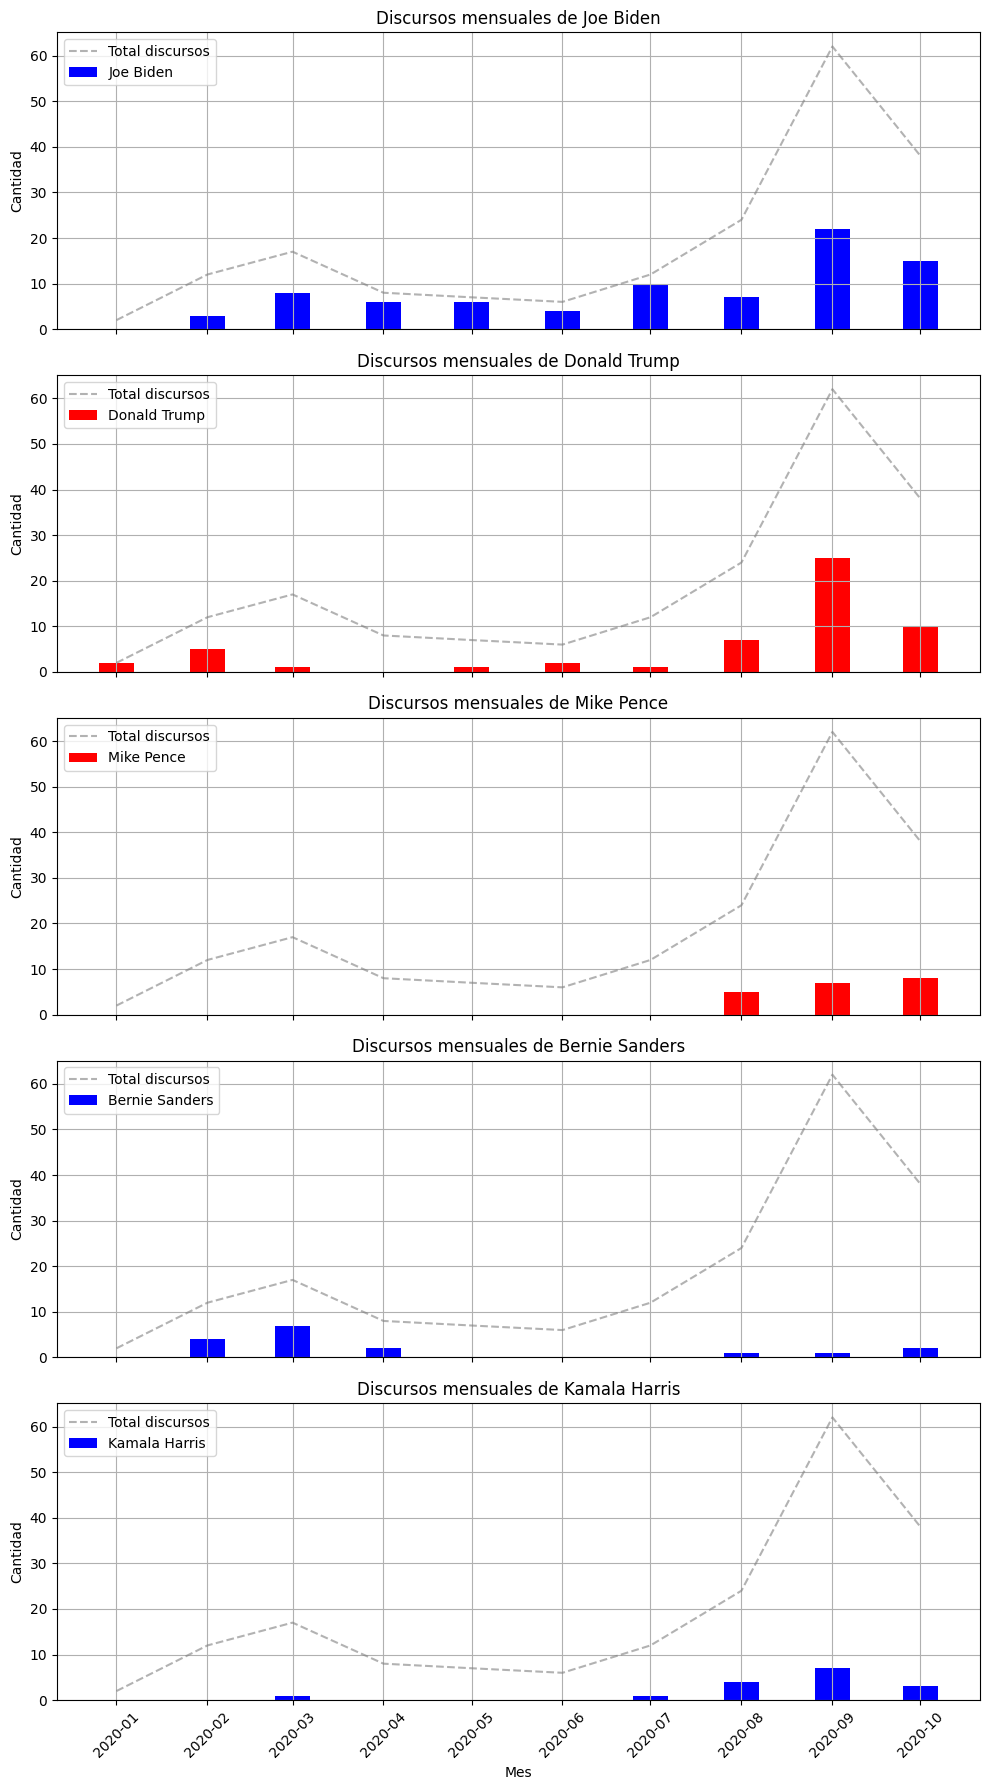

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que 'date' esté en formato datetime y extraer el mes
df_expandidos['date'] = pd.to_datetime(df_expandidos['date'])
df_expandidos['month'] = df_expandidos['date'].dt.to_period('M').dt.to_timestamp()

# Obtener nombres del top 5 desde el índice de top5_speakers
top5_nombres = top5_speakers.index.tolist()

# Filtrar el DataFrame para esos 5 candidatos
df_top5 = df_expandidos[df_expandidos['speaker'].isin(top5_nombres)]

# Crear rango completo de meses
todos_los_meses = pd.date_range(start=df_top5['month'].min(),
                                end=df_top5['month'].max(),
                                freq='MS')

# Calcular el total de discursos por mes (entre todos los candidatos top 5)
total_mensual = df_top5.groupby('month').size().reindex(todos_los_meses, fill_value=0)

# Colores según partido
colores_partido = {
    'Donald Trump': 'red',
    'Mike Pence': 'red',
    'Kamala Harris': 'blue',
    'Joe Biden': 'blue',
    'Bernie Sanders': 'blue'
}

# Crear figura y subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18), sharex=True)

for i, speaker in enumerate(top5_nombres):
    datos_speaker = df_top5[df_top5['speaker'] == speaker]
    conteo_mensual = datos_speaker.groupby('month').size()
    conteo_completo = conteo_mensual.reindex(todos_los_meses, fill_value=0)

    color = colores_partido.get(speaker, 'gray')

    axes[i].bar(conteo_completo.index, conteo_completo.values, width=12, label=speaker, color=color)
    axes[i].plot(total_mensual.index, total_mensual.values, linestyle='--', color='gray', alpha=0.6, label='Total discursos')

    axes[i].set_title(f'Discursos mensuales de {speaker}')
    axes[i].set_ylabel('Cantidad')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Rotar los ticks del eje x en cada subplot
    axes[i].tick_params(axis='x', rotation=45)

# Etiqueta común para el eje x
axes[-1].set_xlabel('Mes')
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
print(df_top5['text'].iloc[59])

Anthony Donald Jr.: (03:19)
(singing) Good afternoon, everyone. My name is Anthony Donald, Jr., co-owner of Headliners Barber Shop, and I would like you guys to help me welcome our next Vice President of the United States, Senator Kamala Harris.
Crowd: (04:06)
Yeah!
Crowd: (04:17)
(singing)
Anthony Donald Jr.: (04:35)
And then this is Garlin.
Anthony Donald Jr.: (04:50)
Good afternoon, everyone.
Crowd: (04:51)
Good afternoon.
Anthony Donald Jr.: (04:52)
Again, my name is Anthony Donald, Jr. I’m the co-owner of Headliners Barber Shop. My father, Anthony Donald, Sr., started this barbershop 18 years ago. He’s a military man. We want to thank everybody for coming out, and I’d like to introduce Reverend Wendell Anthony, of pastor Fellowship Chapel.
Wendell Anthony: (05:13)
Thank you, Anthony, and let me welcome all of you here. I want to certainly welcome our special guest, Senator Kamala Harris, soon to be the Vice President of United States of America, and we are just glad to have her, a

In [ ]:
import re
import unicodedata
import pandas as pd

# Función para extraer solo el texto del orador principal
def extraer_texto_speaker(texto_completo, nombre_objetivo):
    if not isinstance(texto_completo, str) or not texto_completo:
        return ''

    patron = re.compile(r'([^\n:]+): \(\d{2}:\d{2}\)\n(.*?)(?=\n[^\n:]+: \(\d{2}:\d{2}\)|$)', re.DOTALL)
    fragmentos_filtrados = []
    for match in patron.finditer(texto_completo):
        speaker, contenido = match.groups()
        speaker = speaker.strip()
        if speaker == nombre_objetivo:
            fragmentos_filtrados.append(contenido.strip())

    return '\n'.join(fragmentos_filtrados)

# Función para limpieza robusta de texto
def limpiar_texto_robusto(texto):
    if not isinstance(texto, str):
        return ''

    # Convertir a minúsculas
    texto = texto.lower()

    # Normalizar caracteres unicode (eliminar tildes y símbolos raros)
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

    # Eliminar puntuación y caracteres especiales
    texto = re.sub(r'[^a-z\s]', ' ', texto)

    # Eliminar múltiples espacios
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Función para aplicar las operaciones de filtrado y limpieza a cada fila del DataFrame
def obtener_texto_filtrado(row):
    texto = row['text']
    speaker = row['speaker']

    if not texto or not speaker:
        return ''  # Si no hay texto o orador, devolver cadena vacía

    # Aplicar extracción y limpieza robusta
    texto_filtrado = extraer_texto_speaker(texto, speaker)
    texto_limpio = limpiar_texto_robusto(texto_filtrado)

    # Retornar todo el texto limpio
    return texto_limpio

# Aplicar la función a todas las filas del DataFrame y crear la columna 'clean_text'
df_top5['clean_text'] = df_top5.apply(obtener_texto_filtrado, axis=1)

# Verificar los primeros 5 resultados para asegurar que funciona bien
print(df_top5[['speaker', 'clean_text']].head())


        speaker  \
1     Joe Biden   
2  Donald Trump   
3     Joe Biden   
4  Donald Trump   
5  Donald Trump   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

<ipython-input-14-26aa783ade2d>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['clean_text'] = df_top5.apply(obtener_texto_filtrado, axis=1)


In [ ]:
import pandas as pd
from collections import Counter

# Función para contar las palabras más frecuentes por orador
def contar_palabras_por_orador(df_top5):
    conteo_palabras_por_orador = {}

    # Agrupar por 'speaker' para trabajar por orador
    for speaker in df_top5['speaker'].unique():
        # Filtrar los textos del orador
        textos_orador = df_top5[df_top5['speaker'] == speaker]['clean_text']

        # Unir todos los textos del orador en uno solo
        texto_unido = ' '.join(textos_orador)

        # Separar el texto en palabras
        palabras = texto_unido.split()

        # Contar la frecuencia de cada palabra
        contador_palabras = Counter(palabras)

        # Guardar el conteo para ese orador
        conteo_palabras_por_orador[speaker] = contador_palabras

    return conteo_palabras_por_orador

# Aplicar la función para obtener el conteo de palabras por orador
conteo_palabras_orador = contar_palabras_por_orador(df_top5)

# Mostrar las 5 palabras más frecuentes por orador de manera prolija
for speaker, contador in conteo_palabras_orador.items():
    print(f"\nOrador: {speaker}")
    palabras_frecuentes = contador.most_common(5)

    for palabra, frecuencia in palabras_frecuentes:
        print(f"  - {palabra}: {frecuencia} veces")



Orador: Joe Biden
  - the: 8726 veces
  - to: 7065 veces
  - and: 5937 veces
  - a: 3835 veces
  - of: 3810 veces

Orador: Donald Trump
  - the: 2478 veces
  - and: 2023 veces
  - to: 1916 veces
  - i: 1434 veces
  - a: 1426 veces

Orador: Mike Pence
  - the: 2554 veces
  - and: 2049 veces
  - to: 1690 veces
  - of: 1372 veces
  - in: 1167 veces

Orador: Kamala Harris
  - the: 1125 veces
  - and: 881 veces
  - to: 826 veces
  - of: 662 veces
  - that: 516 veces

Orador: Bernie Sanders
  - the: 1889 veces
  - to: 1354 veces
  - and: 1312 veces
  - of: 1064 veces
  - that: 1015 veces


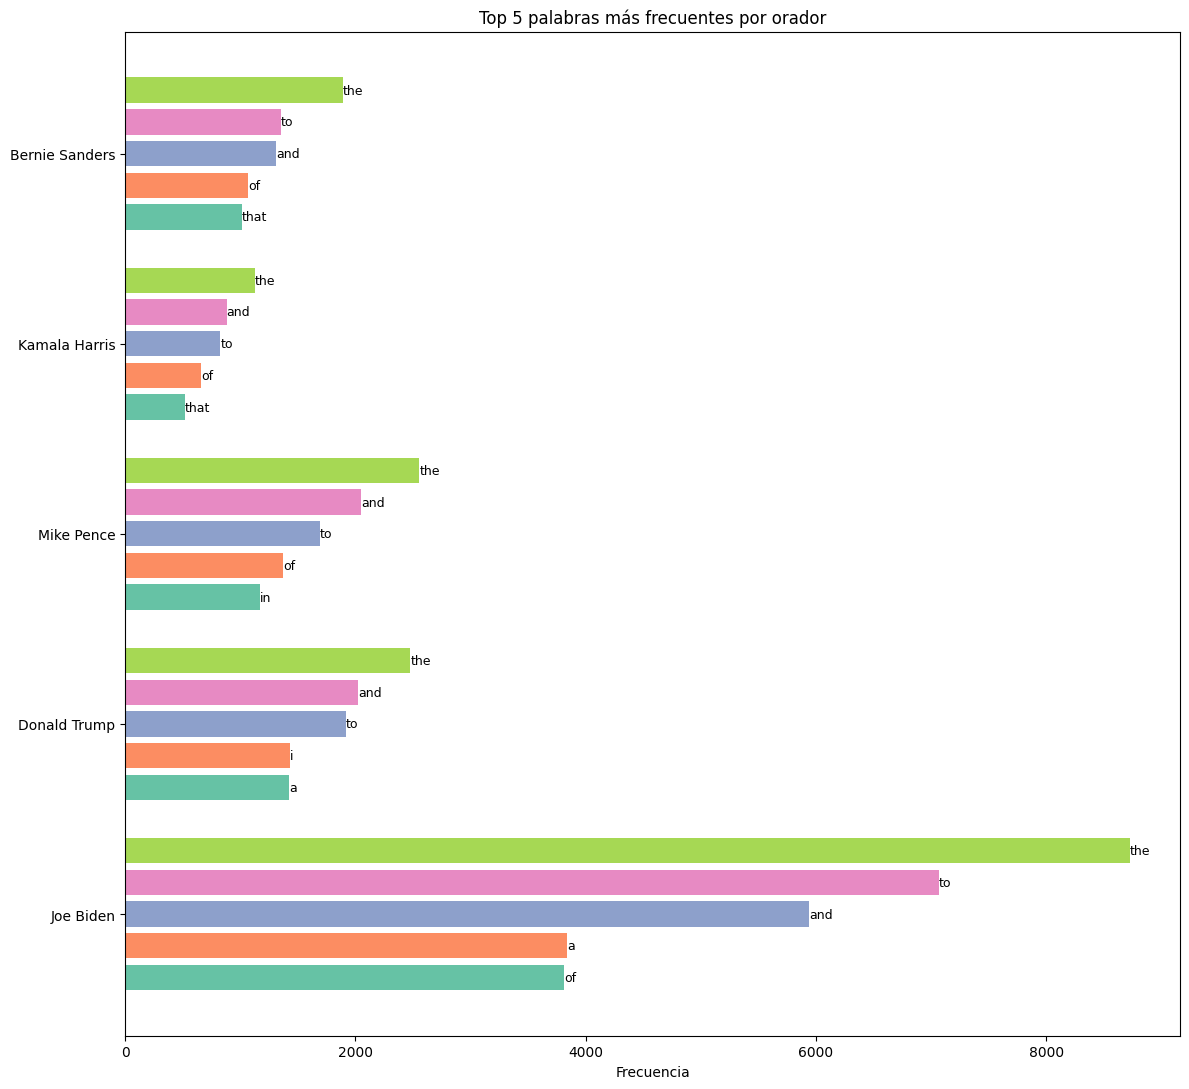

In [ ]:
import matplotlib.pyplot as plt

# Número de palabras más frecuentes por orador
top_n = 5

# Preparar los datos
datos = []
for speaker, contador in conteo_palabras_orador.items():
    for palabra, frecuencia in contador.most_common(top_n):
        datos.append({'orador': speaker, 'palabra': palabra, 'frecuencia': frecuencia})

# Crear un DataFrame auxiliar para graficar
import pandas as pd
df_plot = pd.DataFrame(datos)

# Establecer una figura más grande si hay muchos oradores
fig, ax = plt.subplots(figsize=(12, 6 + len(df_plot['orador'].unique())))

# Paleta de colores
import seaborn as sns
palette = sns.color_palette("Set2", top_n)

# Graficar por orador, una barra por palabra
for i, speaker in enumerate(df_plot['orador'].unique()):
    df_speaker = df_plot[df_plot['orador'] == speaker].sort_values(by='frecuencia', ascending=True)
    palabras = df_speaker['palabra']
    frecuencias = df_speaker['frecuencia']

    y = range(len(palabras))
    ax.barh([y_i + i * (top_n + 1) for y_i in y], frecuencias, color=palette)

    # Etiquetas de palabras dentro de las barras
    for j, (frec, palabra) in enumerate(zip(frecuencias, palabras)):
        ax.text(frec + 0.5, j + i * (top_n + 1), palabra, va='center', fontsize=9)

# Ajustar ejes
ax.set_yticks([(top_n / 2 - 0.5) + i * (top_n + 1) for i in range(len(df_plot['orador'].unique()))])
ax.set_yticklabels(df_plot['orador'].unique())
ax.set_xlabel("Frecuencia")
ax.set_title(f"Top {top_n} palabras más frecuentes por orador")

plt.tight_layout()
plt.show()


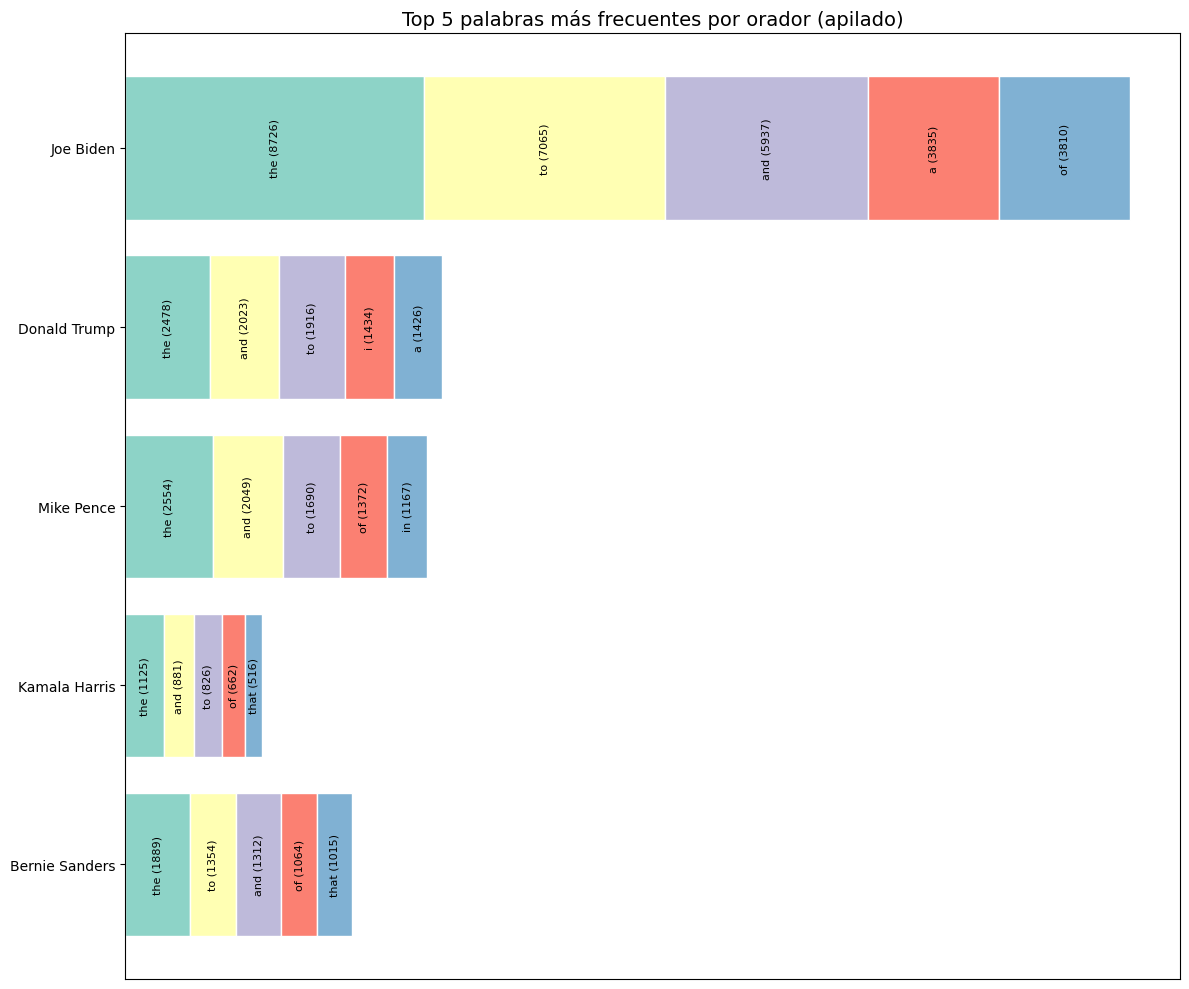

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preparar datos
top_n = 5
datos = []

for speaker, contador in conteo_palabras_orador.items():
    for palabra, frecuencia in contador.most_common(top_n):
        datos.append({'orador': speaker, 'palabra': palabra, 'frecuencia': frecuencia})

df_plot = pd.DataFrame(datos)

# Crear figura
fig, ax = plt.subplots(figsize=(12, 2 * len(df_plot['orador'].unique())))

# Paleta de colores
colors = sns.color_palette("Set3", top_n)

# Plot de barras apiladas
for i, speaker in enumerate(df_plot['orador'].unique()):
    df_speaker = df_plot[df_plot['orador'] == speaker]
    left = 0
    for j, row in df_speaker.iterrows():
        frec = row['frecuencia']
        palabra = row['palabra']
        texto = f"{palabra} ({frec})"  # Texto con la frecuencia entre paréntesis

        ax.barh(y=i, width=frec, left=left, color=colors[j % top_n], edgecolor='white')

        # Mostrar palabra dentro de la barra rotada verticalmente
        ax.text(
            x=left + frec / 2,
            y=i,
            s=texto,
            va='center',
            ha='center',
            rotation=90,
            fontsize=8,  # <-- Cambiá este número para ajustar el tamaño de la fuente
            color='black'
        )
        left += frec

# Etiquetas y estilo
ax.set_yticks(range(len(df_plot['orador'].unique())))
ax.set_yticklabels(df_plot['orador'].unique())
ax.set_xticks([])
ax.set_xlabel("")
ax.set_title(f"Top {top_n} palabras más frecuentes por orador (apilado)", fontsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
temas = {
    'COVID': [
        'covid', 'coronavirus', 'pandemic', 'vaccine', 'vaccination', 'mask',
        'quarantine', 'lockdown', 'health crisis'
    ],
    'economy': [
        'economy', 'jobs', 'employment', 'tax',
        'unemployment', 'business', 'market'
    ],
    'racial_justice': [
        'race', 'racism', 'racial', 'justice', 'equality', 'black lives matter',
        'blm', 'discrimination', 'civil rights', 'protest'
    ],
    'healthcare': [
        'healthcare', 'insurance', 'obamacare', 'medicare',
        'hospital', 'doctor', 'patient', 'public option'
    ],
    'climate_change': [
        'climate', 'environment', 'global warming', 'pollution',
        'green energy', 'renewable', 'sustainability'
    ],
    'immigration': [
        'immigration', 'border', 'wall', 'deportation',
        'visa', 'migrant', 'undocumented'
    ],
    'public_safety': [
        'police', 'crime', 'violence', 'gun', 'shooting', 'safety'
    ],
    'foreign_policy': [
        'china', 'russia', 'iran', 'north korea', 'allies', 'nato',
        'trade war', 'treaty'
    ],
    'civil_rights': [
        'equal rights',
        'lgbtq', 'women rights', 'freedom','gay marriage', 'trans rights',
        'gender equality'
    ],
    'education': [
        'education', 'school', 'student', 'college', 'university',
        'tuition', 'remote learning'
    ]
}

# Crear un diccionario para guardar los resultados
conteo_temas = {}

# Recorrer cada candidato
for speaker in df_top5['speaker'].unique():
    # Filtrar los textos de ese candidato
    textos = df_top5[df_top5['speaker'] == speaker]['clean_text']

    # Unir todos los textos en uno solo
    texto_unido = ' '.join(textos)

    # Inicializar diccionario para este candidato
    temas_candidato = {}

    # Contar por tema
    for tema, palabras_clave in temas.items():
        count = sum(texto_unido.count(palabra) for palabra in palabras_clave)
        temas_candidato[tema] = count

    # Guardar resultados en el diccionario general
    conteo_temas[speaker] = temas_candidato


In [ ]:
temas = {
    'COVID': [
        'covid', 'coronavirus', 'pandemic', 'vaccine', 'vaccination', 'mask',
        'quarantine', 'lockdown', 'health crisis', 'contagion', 'covid cases', 'infection',
       'distancing', 'hand sanitizer', 'ppe', 'cpr', 'outbreak', 'masks'
    ],
    'economy': [
        'economy', 'jobs', 'employment', 'tax', 'unemployment', 'business', 'market',
        'inflation', 'stimulus', 'growth', 'recession', 'gdp', 'debt', 'federal reserve',
        'wages', 'stock market', 'bailout', 'budget', 'small business'
    ],
    'racial_justice': [
        'race', 'racism', 'racial', 'justice', 'equality', 'black lives matter',
        'blm', 'discrimination', 'civil rights', 'protest', 'police brutality', 'injustice',
        'systemic racism', 'minority', 'diversity', 'inclusion', 'racial profiling',
        'reform', 'inequality', 'prejudice'
    ],
    'healthcare': [
        'healthcare', 'insurance', 'obamacare', 'medicare', 'hospital', 'doctor',
        'patient', 'public option', 'coverage', 'health plan', 'pre-existing condition',
        'treatment', 'prescription', 'medicaid', 'clinic', 'primary care', 'medical bill',
        'health system', 'uninsured'
    ],
    'climate_change': [
        'climate', 'environment', 'global warming', 'pollution', 'green energy',
        'renewable', 'sustainability', 'carbon', 'emissions', 'climate crisis',
        'fossil fuels', 'solar', 'wind', 'eco-friendly', 'clean energy', 'net zero',
        'deforestation', 'sea level', 'biodiversity', 'greenhouse gases'
    ],
    'immigration': [
        'immigration', 'border', 'wall', 'deportation', 'visa', 'migrant', 'undocumented',
        'asylum', 'refugee', 'citizenship', 'green card', 'daca', 'ice', 'dreamers',
        'immigration reform', 'detention', 'family separation', 'illegal', 'amnesty', 'sanctuary'
    ],
    'public_safety': [
        'police', 'crime', 'violence', 'gun', 'shooting', 'safety',
        'security', 'law enforcement', 'homicide', 'firearm', 'public order',
        'riot', 'theft', 'self defense', 'emergency', 'domestic violence', 'assault',
        'surveillance', 'criminal justice'
    ],
    'foreign_policy': [
        'china', 'russia', 'iran', 'north korea', 'allies', 'nato', 'trade war', 'treaty',
        'diplomacy', 'sanctions', 'ambassador', 'international', 'conflict',
        'foreign aid', 'embassy', 'defense', 'intelligence', 'military presence',
        'global relations', 'geopolitics'
    ],
    'civil_rights': [
        'equal rights', 'lgbtq', 'women rights', 'freedom', 'gay marriage', 'trans rights',
        'gender equality', 'civil liberties', 'inclusivity', 'human rights', 'right to vote',
        'disability rights', 'reproductive rights', 'equal opportunity', 'affirmative action',
        'expression', 'religious freedom', 'anti-discrimination', 'social justice', 'identity'
    ],
    'education': [
        'education', 'school', 'student', 'college', 'university', 'tuition',
        'remote learning', 'classroom', 'curriculum', 'public school', 'teacher',
        'scholarship', 'academic', 'school funding', 'test score', 'literacy',
        'higher education', 'graduate', 'school choice', 'learning loss'
    ]
}

# Crear un diccionario para guardar los resultados
conteo_temas = {}

# Recorrer cada candidato
for speaker in df_top5['speaker'].unique():
    # Filtrar los textos de ese candidato
    textos = df_top5[df_top5['speaker'] == speaker]['clean_text']

    # Unir todos los textos en uno solo
    texto_unido = ' '.join(textos)

    # Inicializar diccionario para este candidato
    temas_candidato = {}

    # Contar por tema
    for tema, palabras_clave in temas.items():
        count = sum(texto_unido.count(palabra) for palabra in palabras_clave)
        temas_candidato[tema] = count

    # Guardar resultados en el diccionario general
    conteo_temas[speaker] = temas_candidato

In [ ]:
for speaker, temas_contados in conteo_temas.items():
    print(f'\nTemas más mencionados por {speaker}:')
    for tema, conteo in temas_contados.items():
        print(f'{tema}: {conteo}')


Temas más mencionados por Joe Biden:
COVID: 983
economy: 1256
racial_justice: 340
healthcare: 460
climate_change: 232
immigration: 691
public_safety: 359
foreign_policy: 177
civil_rights: 51
education: 604

Temas más mencionados por Donald Trump:
COVID: 257
economy: 282
racial_justice: 127
healthcare: 98
climate_change: 29
immigration: 453
public_safety: 203
foreign_policy: 153
civil_rights: 17
education: 89

Temas más mencionados por Mike Pence:
COVID: 133
economy: 401
racial_justice: 87
healthcare: 82
climate_change: 25
immigration: 330
public_safety: 213
foreign_policy: 145
civil_rights: 127
education: 86

Temas más mencionados por Kamala Harris:
COVID: 87
economy: 102
racial_justice: 153
healthcare: 39
climate_change: 9
immigration: 151
public_safety: 53
foreign_policy: 22
civil_rights: 19
education: 80

Temas más mencionados por Bernie Sanders:
COVID: 130
economy: 210
racial_justice: 101
healthcare: 238
climate_change: 36
immigration: 210
public_safety: 93
foreign_policy: 44
civi

In [ ]:
import pandas as pd

# Convertir el diccionario a un DataFrame
df_conteo_temas = pd.DataFrame.from_dict(conteo_temas, orient='index')

# Mostrar el DataFrame
df_conteo_temas

,COVID,economy,racial_justice,healthcare,climate_change,immigration,public_safety,foreign_policy,civil_rights,education
Joe Biden,983,1256,340,460,232,691,359,177,51,604
Donald Trump,257,282,127,98,29,453,203,153,17,89
Mike Pence,133,401,87,82,25,330,213,145,127,86
Kamala Harris,87,102,153,39,9,151,53,22,19,80
Bernie Sanders,130,210,101,238,36,210,93,44,5,158


<ipython-input-22-fd6990eea74d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['racial_justice_mentions'] = df_top5['clean_text'].apply(contar_racial_justice)
<ipython-input-22-fd6990eea74d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['date'] = pd.to_datetime(df_top5['date'])
<ipython-input-22-fd6990eea74d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

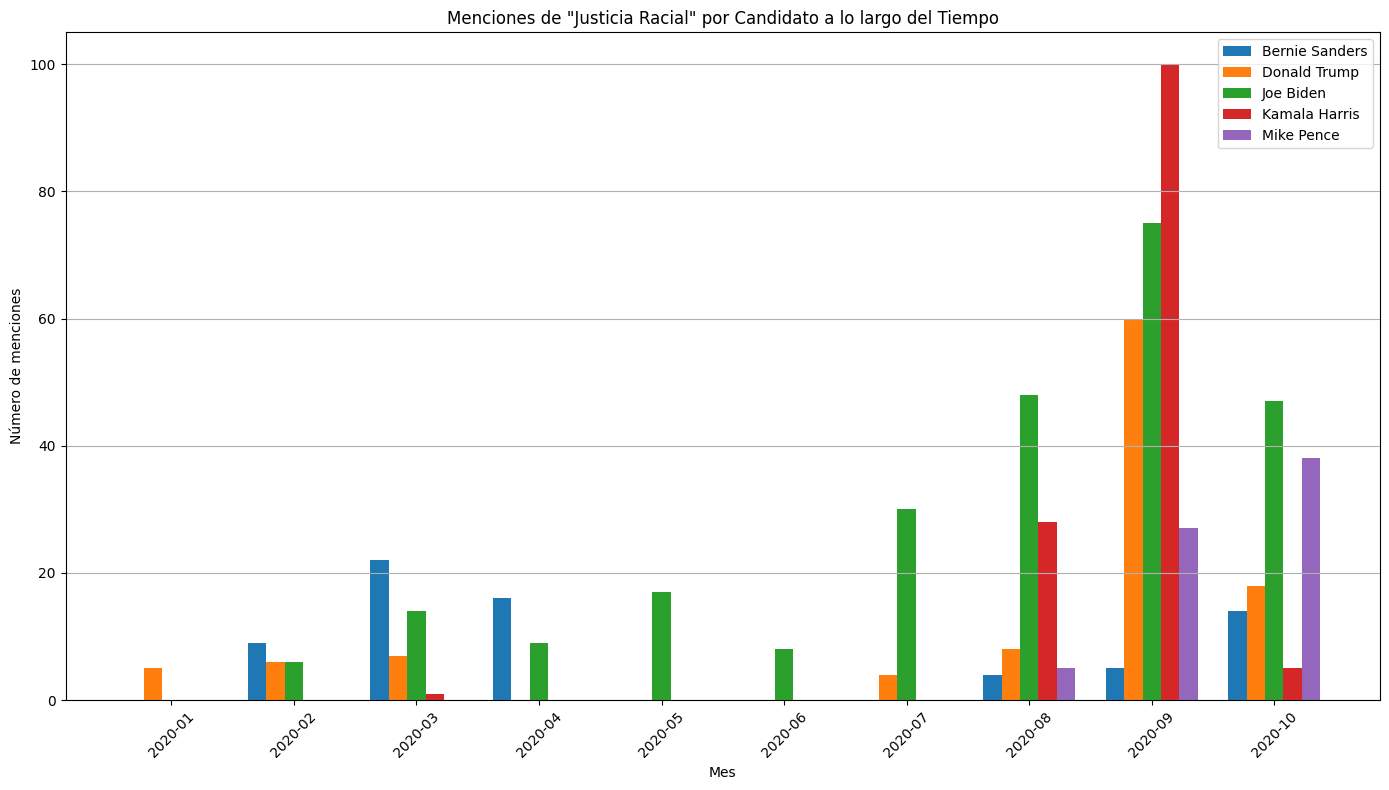

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista de palabras para 'racial_justice'
palabras_racial_justice = [
    'race', 'racism', 'racial', 'justice', 'equality',
    'black lives matter', 'blm', 'discrimination', 'civil rights', 'protest'
]

# Función para contar menciones
def contar_racial_justice(texto):
    if not isinstance(texto, str):
        return 0
    texto = texto.lower()
    return sum(texto.count(palabra) for palabra in palabras_racial_justice)

# Aplicar función
df_top5['racial_justice_mentions'] = df_top5['clean_text'].apply(contar_racial_justice)

# Asegurar formato fecha
df_top5['date'] = pd.to_datetime(df_top5['date'])
df_top5['mes'] = df_top5['date'].dt.to_period('M')

# Agrupar por candidato y mes
menciones_racial_justice = df_top5.groupby(['speaker', 'mes'])['racial_justice_mentions'].sum().unstack('speaker').fillna(0)

# Crear gráfico
plt.figure(figsize=(14, 8))

# Definir posiciones
meses = menciones_racial_justice.index.astype(str)
x = np.arange(len(meses))  # posiciones en el eje x
ancho = 0.15  # ancho de cada barra

# Dibujar barras
for i, candidato in enumerate(menciones_racial_justice.columns):
    plt.bar(x + i * ancho, menciones_racial_justice[candidato], width=ancho, label=candidato)

# Ajustes del gráfico
plt.title('Menciones de "Justicia Racial" por Candidato a lo largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de menciones')
plt.xticks(x + ancho * (len(menciones_racial_justice.columns)-1)/2, meses, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-23-50f483819a44>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['civil_rights_mentions'] = df_top5['clean_text'].apply(contar_civil_rights)
<ipython-input-23-50f483819a44>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['date'] = pd.to_datetime(df_top5['date'])
<ipython-input-23-50f483819a44>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

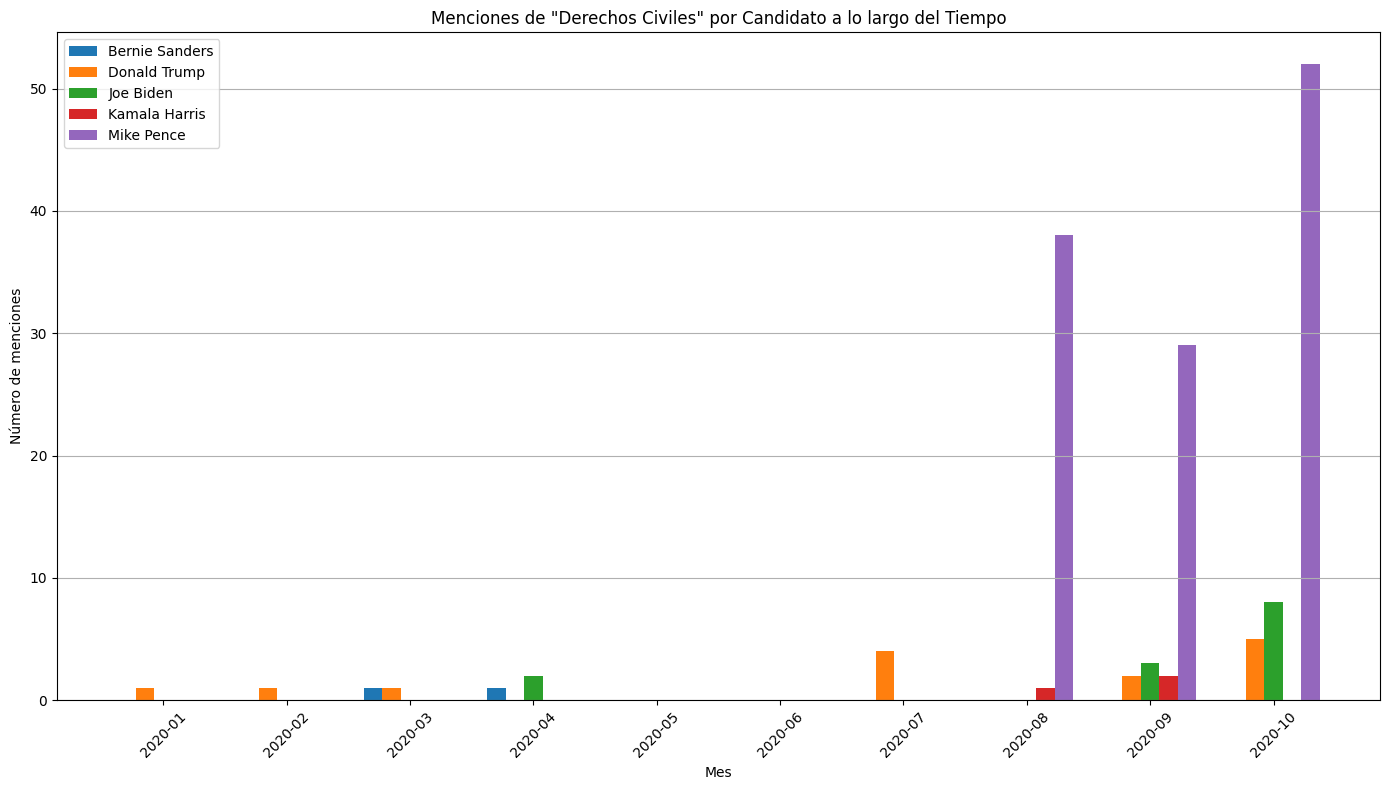

In [ ]:
# Lista de palabras para 'civil_rights'
palabras_civil_rights = [
    'equal rights',
    'lgbtq', 'women rights', 'freedom'
]

# Función para contar menciones
def contar_civil_rights(texto):
    if not isinstance(texto, str):
        return 0
    texto = texto.lower()
    return sum(texto.count(palabra) for palabra in palabras_civil_rights)

# Aplicar función
df_top5['civil_rights_mentions'] = df_top5['clean_text'].apply(contar_civil_rights)

# Asegurar formato fecha
df_top5['date'] = pd.to_datetime(df_top5['date'])
df_top5['mes'] = df_top5['date'].dt.to_period('M')

# Agrupar por candidato y mes
menciones_civil_rights = df_top5.groupby(['speaker', 'mes'])['civil_rights_mentions'].sum().unstack('speaker').fillna(0)

# Crear gráfico
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))

# Definir posiciones
meses = menciones_civil_rights.index.astype(str)
x = np.arange(len(meses))  # posiciones en el eje x
ancho = 0.15  # ancho de cada barra

# Dibujar barras
for i, candidato in enumerate(menciones_civil_rights.columns):
    plt.bar(x + i * ancho, menciones_civil_rights[candidato], width=ancho, label=candidato)

# Ajustes del gráfico
plt.title('Menciones de "Derechos Civiles" por Candidato a lo largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de menciones')
plt.xticks(x + ancho * (len(menciones_civil_rights.columns)-1)/2, meses, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


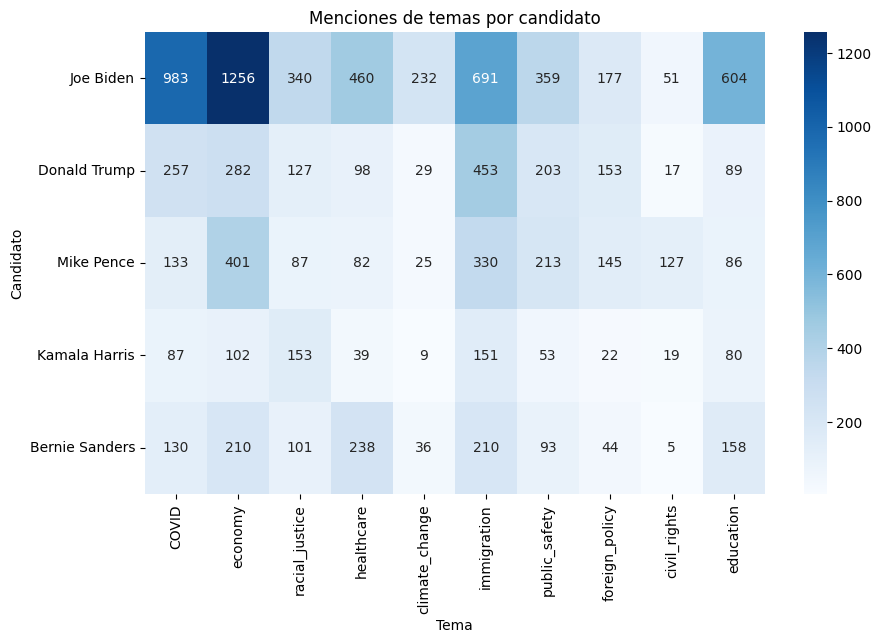

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_conteo_temas, annot=True, cmap='Blues', fmt='d')
plt.title('Menciones de temas por candidato')
plt.ylabel('Candidato')
plt.xlabel('Tema')
plt.show()


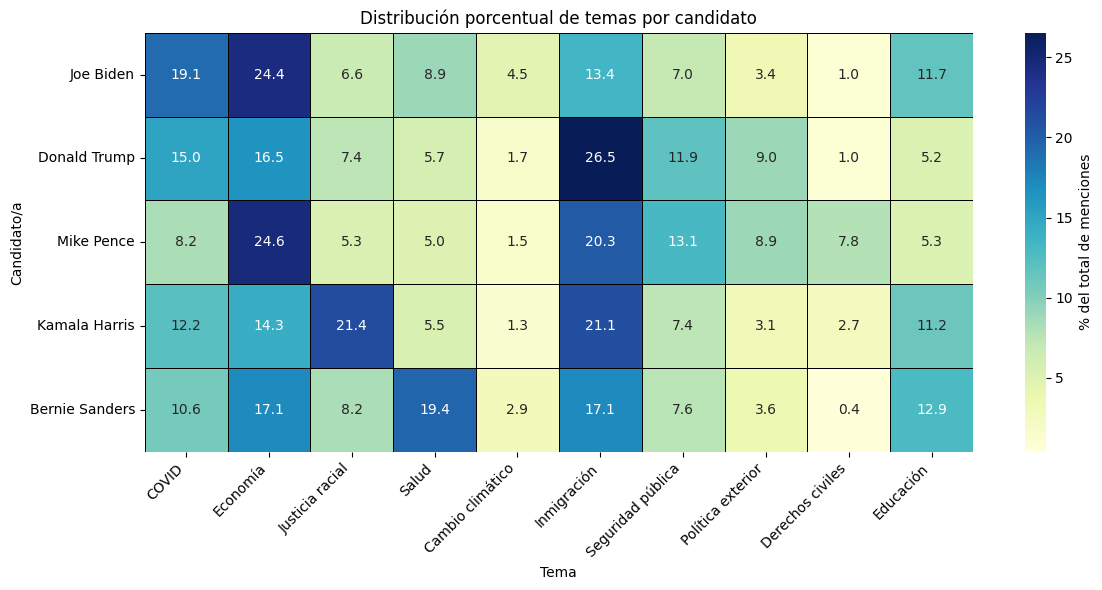

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
traducciones_temas = {
    'covid': 'Covid',
    'economy': 'Economía',
    'racial_justice': 'Justicia racial',
    'healthcare': 'Salud',
    'climate_change': 'Cambio climático',
    'immigration': 'Inmigración',
    'public_safety': 'Seguridad pública',
    'foreign_policy': 'Política exterior',
    'supreme_court': 'Corte Suprema',
    'civil_rights': 'Derechos civiles',
    'education': 'Educación'
}
# Calcular el total de menciones por candidato
totales = df_conteo_temas.sum(axis=1)

# Calcular porcentajes por tema
df_porcentajes = df_conteo_temas.div(totales, axis=0) * 100

# Renombrar columnas con los nombres en español
df_porcentajes.rename(columns=traducciones_temas, inplace=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.heatmap(df_porcentajes, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': '% del total de menciones'},
    linewidths=0.5,           # Grosor de los bordes
    linecolor='black'     # Color de los bordes
)
plt.title('Distribución porcentual de temas por candidato')
plt.ylabel('Candidato/a')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular la cantidad total de palabras por candidato
total_palabras = {}

for candidato in df_top5['speaker'].unique():
    textos = df_top5[df_top5['speaker'] == candidato]['clean_text']
    cantidad = textos.str.split().explode().count()
    total_palabras[candidato] = cantidad

# Mostrar
total_palabras

{'Joe Biden': np.int64(188132),
 'Donald Trump': np.int64(66389),
 'Mike Pence': np.int64(50244),
 'Kamala Harris': np.int64(23435),
 'Bernie Sanders': np.int64(40070)}

In [ ]:
# Calcular la cantidad total de palabras y cantidad de discursos válidos por candidato
promedio_palabras = {}

for candidato in df_top5['speaker'].unique():
    textos = df_top5[(df_top5['speaker'] == candidato) & (df_top5['clean_text'].notna())]['clean_text']
    cantidad_palabras = textos.str.split().explode().count()
    cantidad_discursos = textos.shape[0]

    if cantidad_discursos > 0:
        promedio = cantidad_palabras / cantidad_discursos
    else:
        promedio = 0

    promedio_palabras[candidato] = promedio

# Mostrar el resultado
promedio_palabras


{'Joe Biden': np.float64(2322.617283950617),
 'Donald Trump': np.float64(1229.4259259259259),
 'Mike Pence': np.float64(2512.2),
 'Kamala Harris': np.float64(1464.6875),
 'Bernie Sanders': np.float64(2357.0588235294117)}

In [ ]:
pd.set_option('display.max_colwidth', None)
print(df_top5['text'].iloc[0])

Joe Biden: (00:00)
Hello, Michigan. Hi, how are you? What’s your name? Sam, good to see you, man. Thanks for being here. I appreciate it. Alexia, thank you for taking the time telling your story, it’s important. Unfortunately, there are an awful lot of stories like yours all over America as I travel the country, too many, it don’t have to be. And, folks, it’s great to be back, it’s great to be here.
Joe Biden: (00:39)
There’s not a better governor in the United States of America than Gretchen Whitmer, that’s a fact. I’ve met virtually all of them. And Gary, we badly need you back in the United States Senate, pal, we badly need you back in the United States Senate. And then my sister, Debbie Stabenow. God love you, Debbie. We worked so closely together for so long and as vice-president as well.
Joe Biden: (01:13)
Folks, look, we need to send Gary back to another term. Standing up for Michigan, Michigan families, small businesses. He was our main congressional partner back in 2010 when w

In [ ]:
# Crear una copia para no perder el original
df_conteo_temas_norm = df_conteo_temas.copy()

# Dividir cada valor por el total de palabras del candidato
for candidato in df_conteo_temas_norm.index:
    df_conteo_temas_norm.loc[candidato] = df_conteo_temas_norm.loc[candidato] / total_palabras[candidato]

# Opcional: multiplicar por 100 para tener porcentaje
df_conteo_temas_norm = df_conteo_temas_norm * 100

# Mostrar
df_conteo_temas_norm


<ipython-input-28-3e6f9001d08a>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0052250547487934' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_conteo_temas_norm.loc[candidato] = df_conteo_temas_norm.loc[candidato] / total_palabras[candidato]
<ipython-input-28-3e6f9001d08a>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.006676163544745179' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_conteo_temas_norm.loc[candidato] = df_conteo_temas_norm.loc[candidato] / total_palabras[candidato]
<ipython-input-28-3e6f9001d08a>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0018072417238959879' has dtype incompatible with int64, please explicitly cast to 

,COVID,economy,racial_justice,healthcare,climate_change,immigration,public_safety,foreign_policy,civil_rights,education
Joe Biden,0.522505,0.667616,0.180724,0.244509,0.123318,0.367295,0.190823,0.094083,0.027109,0.321051
Donald Trump,0.387112,0.424769,0.191297,0.147615,0.043682,0.682342,0.305774,0.230460,0.025607,0.134058
Mike Pence,0.264708,0.798105,0.173155,0.163204,0.049757,0.656795,0.423931,0.288592,0.252766,0.171165
Kamala Harris,0.371240,0.435246,0.652870,0.166418,0.038404,0.644335,0.226157,0.093877,0.081075,0.341370
Bernie Sanders,0.324432,0.524083,0.252059,0.593961,0.089843,0.524083,0.232094,0.109808,0.012478,0.394310


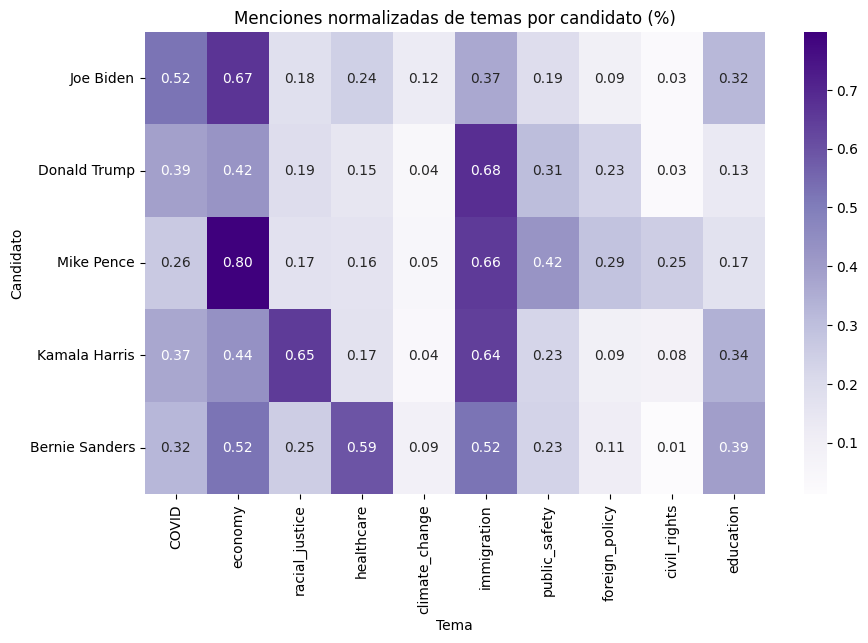

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_conteo_temas_norm, annot=True, cmap='Purples', fmt='.2f')
plt.title('Menciones normalizadas de temas por candidato (%)')
plt.ylabel('Candidato')
plt.xlabel('Tema')
plt.show()


In [ ]:
# Primero nos aseguramos de que la columna fecha esté en formato datetime
df_top5['date'] = pd.to_datetime(df_top5['date'])

# Creamos una nueva columna de año-mes (ej: "2020-06")
df_top5['year_month'] = df_top5['date'].dt.to_period('M').astype(str)

# Función mejorada para contar menciones
def contar_menciones_floyd(text):
    if isinstance(text, str):
        text = text.lower()
        count_george_floyd = text.count('george floyd')
        text_sin_george = text.replace('george floyd', '')
        count_floyd = text_sin_george.count('floyd')
        return count_george_floyd + count_floyd
    return 0

# Aplicar función
df_top5['floyd_mentions'] = df_top5['clean_text'].apply(contar_menciones_floyd)

# Agrupar por speaker y mes
menciones_floyd_mes = df_top5.groupby(['speaker', 'year_month'])['floyd_mentions'].sum()

# Mostrar el resultado
print(menciones_floyd_mes)

speaker         year_month
Bernie Sanders  2020-02       0
                2020-03       0
                2020-04       0
                2020-08       0
                2020-09       0
                2020-10       0
Donald Trump    2020-01       0
                2020-02       0
                2020-03       0
                2020-05       0
                2020-06       0
                2020-07       0
                2020-08       0
                2020-09       1
                2020-10       0
Joe Biden       2020-02       0
                2020-03       0
                2020-04       0
                2020-05       0
                2020-06       0
                2020-07       2
                2020-08       4
                2020-09       0
                2020-10       2
Kamala Harris   2020-03       0
                2020-07       0
                2020-08       1
                2020-09       4
                2020-10       0
Mike Pence      2020-08       0
             

<ipython-input-30-ee3a6e8a7934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['date'] = pd.to_datetime(df_top5['date'])
<ipython-input-30-ee3a6e8a7934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['year_month'] = df_top5['date'].dt.to_period('M').astype(str)
<ipython-input-30-ee3a6e8a7934>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

<Figure size 1400x800 with 0 Axes>

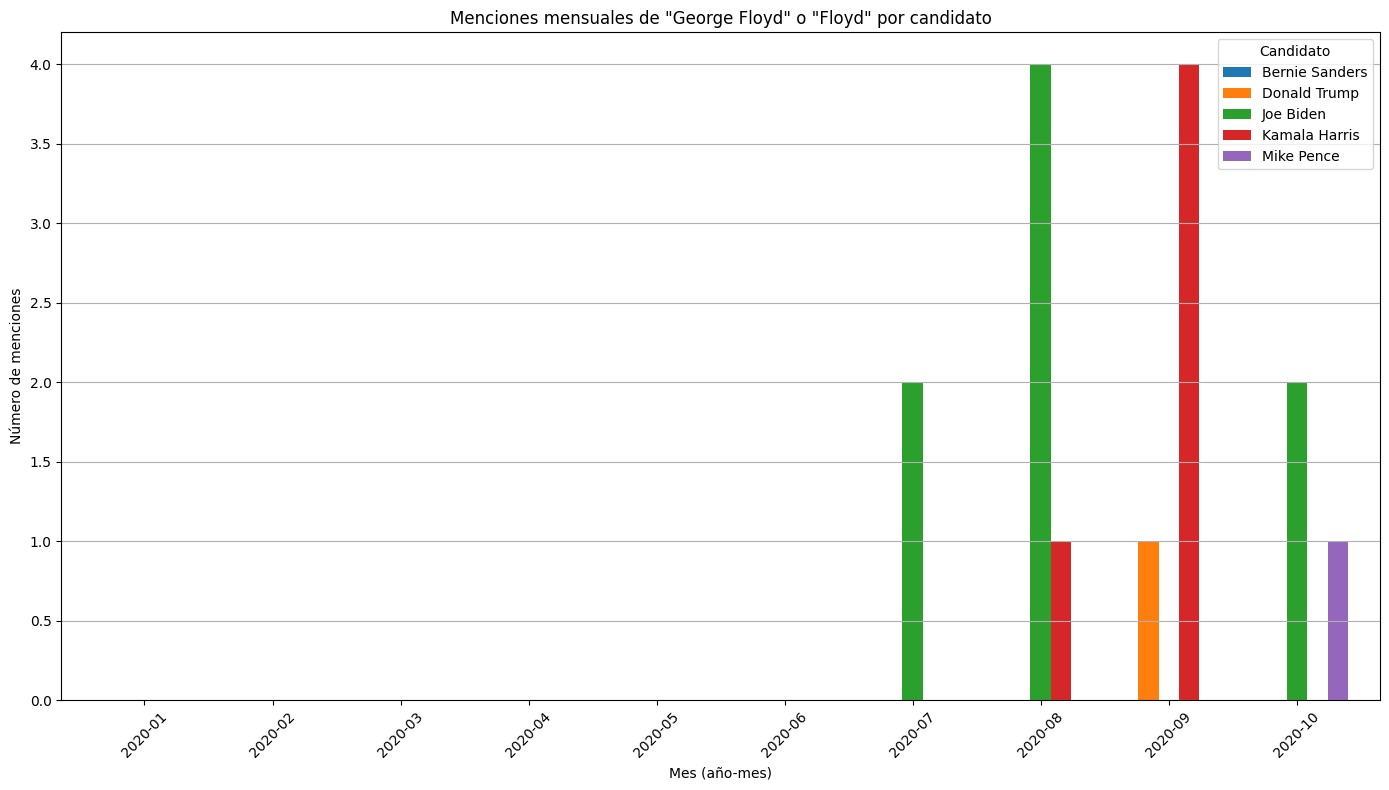

In [ ]:
import matplotlib.pyplot as plt

# Volvemos a organizar los datos
# (por si no estaba bien ordenado)
menciones_floyd_mes = menciones_floyd_mes.sort_index()

# Hacer un gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Pivotar para tener meses en filas y candidatos en columnas
pivot = menciones_floyd_mes.unstack(level=0)

# Crear el gráfico de barras
pivot.plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8
)

plt.title('Menciones mensuales de "George Floyd" o "Floyd" por candidato')
plt.xlabel('Mes (año-mes)')
plt.ylabel('Número de menciones')
plt.xticks(rotation=45)
plt.legend(title='Candidato')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Listas de candidatos
candidatos = ['Joe Biden', 'Donald Trump', 'Bernie Sanders', 'Kamala Harris', 'Mike Pence']
candidatos_mencionados = ['biden', 'trump', 'sanders', 'harris', 'pence']

# Crear diccionario de mapeo
mapeo_mencionado_a_formato = dict(zip(candidatos_mencionados, candidatos))

# Crear matriz vacía
matriz_menciones = pd.DataFrame(
    0,
    index=candidatos,
    columns=candidatos
)

# Función para contar menciones de un nombre en un texto
def contar_menciones(texto, nombre):
    if not isinstance(texto, str):
        return 0
    return texto.lower().count(nombre.lower())

# Recorrer el DataFrame de discursos
for idx, row in df_top5.iterrows():
    quien_habla = row['speaker']

    # Asegurarse de que quien habla esté en la lista de interés
    if quien_habla in candidatos:
        for mencionado_min in candidatos_mencionados:
            mencionado_formato = mapeo_mencionado_a_formato[mencionado_min]

            # Evitar que se cuente a sí mismo
            if quien_habla != mencionado_formato:
                cantidad = contar_menciones(row['clean_text'], mencionado_min)
                matriz_menciones.loc[quien_habla, mencionado_formato] += cantidad

# Mostrar matriz
print(matriz_menciones)

                Joe Biden  Donald Trump  Bernie Sanders  Kamala Harris  \
Joe Biden               0           420               8             23   
Donald Trump          110             0               7              4   
Bernie Sanders         61           127               0              1   
Kamala Harris          35            36               0              0   
Mike Pence            249           312               5             41   

                Mike Pence  
Joe Biden                3  
Donald Trump             2  
Bernie Sanders           0  
Kamala Harris            4  
Mike Pence               0  
